<a href="https://colab.research.google.com/github/redouaneelaouni/computer-vision-assignments/blob/main/REDOUANE_EL_AOUNI_devoir2_nn_based_classifier_torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chargement du Dataset**

1.   Importez les bibliothèques nécessaires, y compris PyTorch et les outils de manipulation de données.
2.   Chargez le dataset à partir de la source, par exemple, à partir d'un fichier CSV ou d'une bibliothèque de données PyTorch.

3.   Explorez et visualisez les données pour mieux les comprendre, par exemple, en affichant quelques échantillons ou en traçant des statistiques descriptives.


In [1]:
# Import des bibliothèques
import torch
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


In [2]:
# Chargement du dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())


100%|██████████| 170498071/170498071 [00:13<00:00, 12886344.71it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [3]:
# Exploration des données
print("Nombre d'échantillons dans l'ensemble d'entraînement:", len(train_dataset))
print("Nombre d'échantillons dans l'ensemble de test:", len(test_dataset))


Nombre d'échantillons dans l'ensemble d'entraînement: 50000
Nombre d'échantillons dans l'ensemble de test: 10000


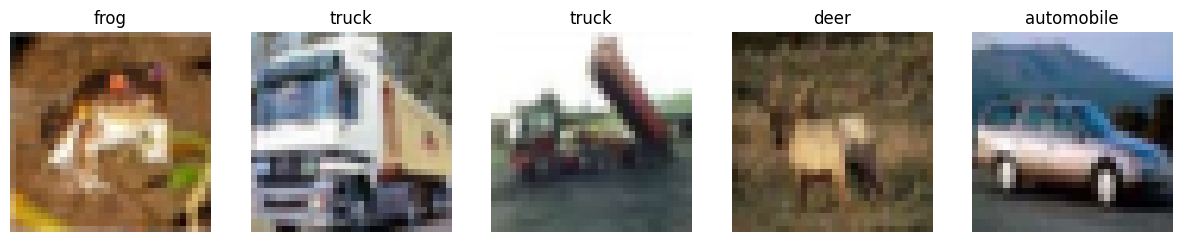

In [4]:

# Affichage d'échantillons
def show_samples(dataset, classes):
    fig, axs = plt.subplots(1, 5, figsize=(15, 3), sharey=True)
    for i in range(5):
        sample, label = dataset[i]
        axs[i].imshow(sample.permute(1, 2, 0))
        axs[i].set_title(classes[label])
        axs[i].axis('off')
    plt.show()

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
show_samples(train_dataset, classes)

# **Création du Réseau de Neurones**


1.   Définissez l'architecture du réseau de neurones en créant une classe héritant de torch.nn.Module.
2.   Définissez les couches et les opérations à l'intérieur de la classe.
3.   Initialisez les poids du réseau.





In [5]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64*8*8, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = x.view(-1, 64*8*8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialisation du réseau
model = SimpleCNN()


# **Choix de la Fonction de Perte et de l'Optimiseur**


1.   Choisissez une fonction de perte appropriée en fonction de la tâche de classification.
2.   Choisissez un optimiseur pour entraîner le réseau de neurones.




In [6]:
import torch.optim as optim

# Choix de la fonction de perte
criterion = nn.CrossEntropyLoss()

# Choix de l'optimiseur
optimizer = optim.Adam(model.parameters(), lr=0.001)


# **Boucle d'Entraînement**


1.   Définissez la boucle d'entraînement principale qui comprend la propagation avant, le calcul de la perte, la rétropropagation et la mise à jour des poids du réseau.




In [7]:
 # Création du DataLoader pour l'ensemble d'entraînement
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

# Boucle d'entraînement
def train(model, train_loader, criterion, optimizer, num_epochs=5):
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if i % 100 == 99:  # Imprimer toutes les 100 mini-lots
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 100))
                running_loss = 0.0

# Entraînement du modèle en utilisant train_loader
train(model, train_loader, criterion, optimizer)


[1,   100] loss: 2.012
[1,   200] loss: 1.640
[1,   300] loss: 1.541
[1,   400] loss: 1.473
[1,   500] loss: 1.415
[1,   600] loss: 1.346
[1,   700] loss: 1.333
[2,   100] loss: 1.214
[2,   200] loss: 1.228
[2,   300] loss: 1.177
[2,   400] loss: 1.154
[2,   500] loss: 1.147
[2,   600] loss: 1.086
[2,   700] loss: 1.086
[3,   100] loss: 1.024
[3,   200] loss: 0.991
[3,   300] loss: 0.994
[3,   400] loss: 0.979
[3,   500] loss: 0.977
[3,   600] loss: 0.977
[3,   700] loss: 0.959
[4,   100] loss: 0.920
[4,   200] loss: 0.895
[4,   300] loss: 0.887
[4,   400] loss: 0.884
[4,   500] loss: 0.886
[4,   600] loss: 0.869
[4,   700] loss: 0.886
[5,   100] loss: 0.811
[5,   200] loss: 0.800
[5,   300] loss: 0.805
[5,   400] loss: 0.838
[5,   500] loss: 0.800
[5,   600] loss: 0.832
[5,   700] loss: 0.819


# **Évaluation sur l'Ensemble de Test**


1.   Évaluez les performances du modèle sur l'ensemble de test pour comprendre à quel point il généralise bien aux données non vues.




In [8]:
# Création du DataLoader pour l'ensemble de test
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Évaluation du modèle
def test(model, test_loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print('Accuracy of the network on the 10000 test images: %d %%' % (
        100 * correct / total))

# Évaluation du modèle en utilisant test_loader
test(model, test_loader)



Accuracy of the network on the 10000 test images: 68 %
